In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
full_ds = pd.read_csv('full_benchmark_results.csv')

In [60]:
full_ds

,Experiment ID,model_name,wv_test_score,vww_test_score,distance-near,distance-mid,distance-far,miap-female,miap-male,miap-unknown-gender,...,miap-unknown-age,lighting-dark,lighting-normal_light,lighting-bright,hands,feet,depictions_persons,depictions_non_persons,non_person_no_depictions,macs
0,wv_small_256x256_2024_03_04-10_58_34_AM,wv_mobilenetv2_is_256,0.904995,0.909885,0.769027,0.735479,0.652722,0.956457,0.950162,0.801401,...,0.750859,0.900462,0.897720,0.863410,0.397307,0.338272,0.849216,0.913969,0.913671,391178752
1,wv_model_size_1.5_2024_03_03-11_41_34_PM,wv_small_mobilenetv2_1.5_is_160,0.895045,0.907120,0.769895,0.735354,0.657535,0.955271,0.936645,0.794362,...,0.744373,0.891636,0.883752,0.860951,0.422917,0.338094,0.842049,0.905882,0.905103,342306240
2,wv_small_224x224_2024_03_03-09_53_43_PM,wv_mobilenetv2_is_224,0.903865,0.906429,0.772468,0.739989,0.663355,0.957354,0.949187,0.800680,...,0.750033,0.901301,0.895095,0.866900,0.422135,0.450486,0.849761,0.911404,0.912523,299496832
3,wv_model_size_1.0_2024_03_03-10_10_51_AM,wv_small_mobilenetv2_1.0_is_160,0.892725,0.902257,0.771589,0.738296,0.663949,0.948104,0.933208,0.791699,...,0.742348,0.888654,0.881304,0.857383,0.421992,0.376433,0.839024,0.898856,0.903043,152805760
4,wv_small_192x192_2024_03_03-07_15_34_AM,wv_mobilenetv2_is_192,0.899688,0.906083,0.769868,0.737359,0.656929,0.953320,0.942118,0.802190,...,0.755550,0.896398,0.890480,0.857951,0.422805,0.414204,0.838397,0.910804,0.908939,220039168
5,wv_model_size_0.5_2024_03_02-10_31_25_PM,wv_small_mobilenetv2_0.5_is_160,0.884321,0.890184,0.756310,0.715958,0.632152,0.941593,0.925082,0.779858,...,0.729134,0.878901,0.872285,0.842095,0.455279,0.294769,0.805637,0.892522,0.896167,48906560
6,wv_small_160x160_2024_03_02-06_32_44_PM,wv_mobilenetv2_is_160,0.892649,0.900726,0.765404,0.730186,0.648339,0.950485,0.935603,0.793322,...,0.744161,0.890199,0.881045,0.856377,0.457093,0.337094,0.839379,0.903343,0.902818,152805760
7,wv_model_size_0.35_2024_03_02-10_26_32_AM,wv_small_mobilenetv2_0.35_is_160,0.878712,0.883715,0.754225,0.712832,0.634115,0.933260,0.915865,0.774048,...,0.723951,0.874355,0.863843,0.843364,0.430499,0.294573,0.816195,0.888729,0.891142,29597360
8,wv_small_128x128_2024_03_02-01_56_12_AM,wv_mobilenetv2_is_128,0.880510,0.892455,0.758442,0.718079,0.640376,0.939750,0.920561,0.774186,...,0.723290,0.881623,0.864145,0.842950,0.436669,0.375867,0.825934,0.888756,0.892981,97796608
9,wv_small_96x96_2024_03_01-01_27_44_PM,wv_mobilenetv2_is_96,0.860887,0.879716,0.731664,0.676863,0.581904,0.928380,0.894662,0.742595,...,0.689508,0.860074,0.838645,0.819373,0.412538,0.294820,0.803218,0.874467,0.877105,55011712


In [132]:
model_scaling  = full_ds[full_ds['Experiment ID'].str.contains('.')]
image_scaling  = full_ds[full_ds['Experiment ID'].str.contains('x')]
model_scaling  = model_scaling[model_scaling['model_name'].str.contains('is_160')]

In [142]:
experiment_names = ['model_scaling', 'image_scaling']
dfs = [model_scaling.drop([3]), image_scaling]

combined_df = pd.concat(dfs, keys=experiment_names, names=['experiment'])


In [143]:
combined_df = combined_df[combined_df['Experiment ID'] != 'wv_small_384x384_2024_03_05-02_12_04_AM']
image_scaling = image_scaling[image_scaling['Experiment ID'] != 'wv_small_384x384_2024_03_05-02_12_04_AM']


In [189]:
combined_df.reset_index(inplace=True)

In [191]:
model_scaling  = combined_df[combined_df['Experiment ID'].str.contains('.')]
image_scaling  = combined_df[combined_df['Experiment ID'].str.contains('x')]
model_scaling  = model_scaling[model_scaling['model_name'].str.contains('is_160')]

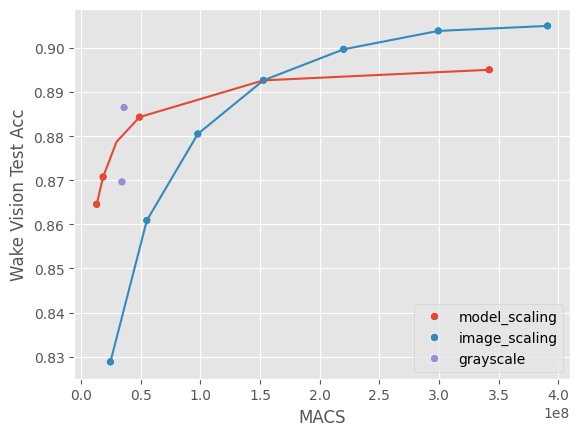

In [242]:
import seaborn as sns
target_metric = 'wv_test_score'
x_metric = 'macs'

import matplotlib.pyplot as plt

sns.scatterplot(data=combined_df, x=x_metric, y=target_metric, hue='experiment')
plt.xlabel("MACS")
plt.ylabel("Wake Vision Test Acc")
# plt.title('Scatterplot of ' + target_metric + ' vs ' + x_metric)
plt.legend(loc = "lower right")

x1 = list(model_scaling[x_metric])
y1 = list(model_scaling[target_metric])
x1.sort()
y1.sort()
plt.plot(x1, y1)

x2 = list(image_scaling[x_metric])
y2 = list(image_scaling[target_metric])
x2.sort()
y2.sort()
plt.plot(x2, y2)
# plt.xscale('log')
plt.show()


[Text(-50000000.0, 0, '−0.5'), Text(0.0, 0, '0.0'), Text(50000000.0, 0, '0.5'), Text(100000000.0, 0, '1.0'), Text(150000000.0, 0, '1.5'), Text(200000000.0, 0, '2.0'), Text(250000000.0, 0, '2.5'), Text(300000000.0, 0, '3.0'), Text(350000000.0, 0, '3.5'), Text(400000000.0, 0, '4.0'), Text(450000000.0, 0, '4.5')]


/tmp/ipykernel_3083528/2273687660.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



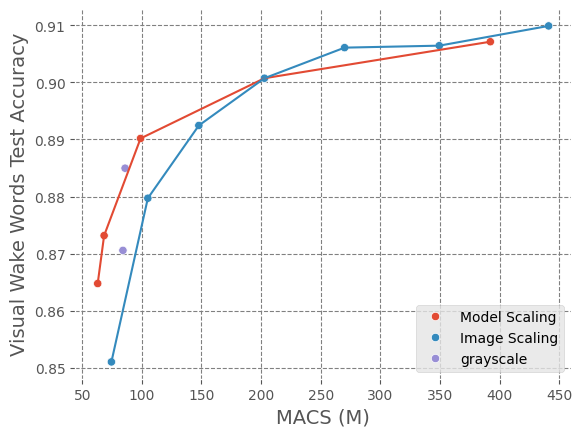

In [243]:
target_metric = 'vww_test_score'
x_metric = 'macs'

plt.style.use('ggplot')
fig, ax = plt.subplots()
sns.scatterplot(data=combined_df, x=x_metric, y=target_metric, hue='experiment')
plt.xlabel("MACS (M)", fontsize=14)
plt.ylabel("Visual Wake Words Test Accuracy", fontsize=14)
# plt.title('Scatterplot of ' + target_metric + ' vs ' + x_metric)
l=plt.legend(loc = "lower right")
l.get_texts()[0].set_text('Model Scaling')
l.get_texts()[1].set_text('Image Scaling')


x1 = list(model_scaling.drop([3])[x_metric])
y1 = list(model_scaling.drop([3])[target_metric])
x1.sort()
y1.sort()
plt.plot(x1, y1)

x2 = list(image_scaling[x_metric])
y2 = list(image_scaling[target_metric])
x2.sort()
y2.sort()
plt.plot(x2, y2)

fig.canvas.draw()
print(ax.get_xticklabels())
labels = [str(int(float(item.get_text())*100.0)) for item in ax.get_xticklabels()[1:]]

ax.set_xticklabels(labels)
ax.yaxis.grid(color='gray', linestyle='--')
ax.xaxis.grid(color='gray', linestyle='--')
ax.patch.set_facecolor('white')
plt.show()

/tmp/ipykernel_3083528/2732840552.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_3083528/2732840552.py:35: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



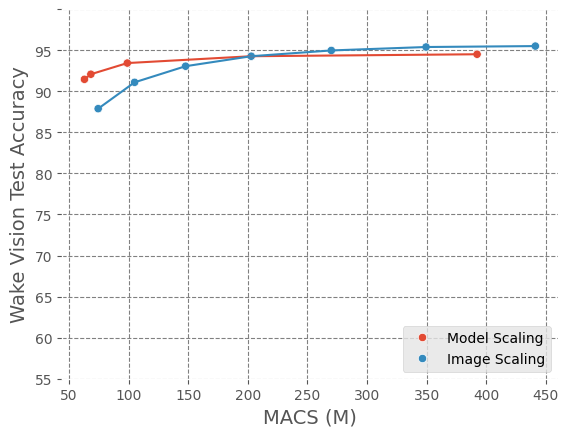

In [205]:
target_metric = 'wv_test_score'
x_metric = 'macs'

plt.style.use('ggplot')
fig, ax = plt.subplots()
sns.scatterplot(data=combined_df, x=x_metric, y=target_metric, hue='experiment')
plt.xlabel("MACS (M)", fontsize=14)
plt.ylabel("Wake Vision Test Accuracy", fontsize=14)
# plt.title('Scatterplot of ' + target_metric + ' vs ' + x_metric)
l=plt.legend(loc = "lower right")
l.get_texts()[0].set_text('Model Scaling')
l.get_texts()[1].set_text('Image Scaling')


x1 = list(model_scaling.drop([3])[x_metric])
y1 = list(model_scaling.drop([3])[target_metric])
x1.sort()
y1.sort()
plt.plot(x1, y1)

x2 = list(image_scaling[x_metric])
y2 = list(image_scaling[target_metric])
x2.sort()
y2.sort()
plt.plot(x2, y2)
ax.set_ylim(.5, 0.95)

fig.canvas.draw()
labels = [str(int(float(item.get_text())*100.0)) for item in ax.get_yticklabels()[1:]]

ax.set_yticklabels(labels)

labels = [str(int(float(item.get_text())*100.0)) for item in ax.get_xticklabels()[1:]]

ax.set_xticklabels(labels)
ax.yaxis.grid(color='gray', linestyle='--')
ax.xaxis.grid(color='gray', linestyle='--')
ax.patch.set_facecolor('white')
ax.set_ylim(.5, 0.95)
plt.show()

/tmp/ipykernel_3083528/3204735587.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



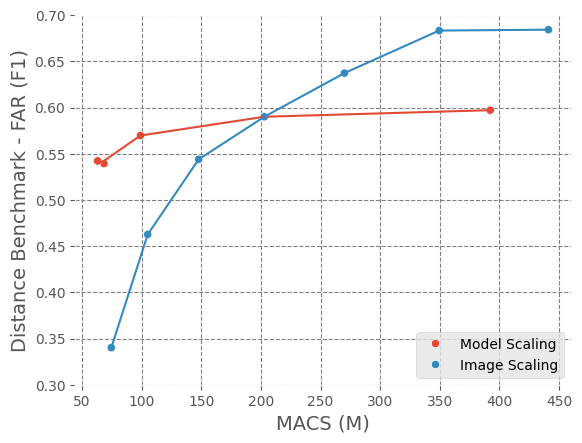

In [204]:
target_metric = 'distance-far'
x_metric = 'macs'
import numpy as np

plt.style.use('ggplot')
fig, ax = plt.subplots()
sns.scatterplot(data=combined_df, x=x_metric, y=target_metric, hue='experiment')
plt.xlabel("MACS (M)", fontsize=14)
plt.ylabel("Distance Benchmark - FAR (F1)", fontsize=14)
# plt.title('Scatterplot of ' + target_metric + ' vs ' + x_metric)
l=plt.legend(loc = "lower right")
l.get_texts()[0].set_text('Model Scaling')
l.get_texts()[1].set_text('Image Scaling')


x1 = list(model_scaling.drop([3])[x_metric])
y1 = list(model_scaling.drop([3])[target_metric])
x1.sort()
y1.sort()
plt.plot(x1, y1)

x2 = list(image_scaling[x_metric])
y2 = list(image_scaling[target_metric])
x2.sort()
y2.sort()
plt.plot(x2, y2)

fig.canvas.draw()
labels = [str(int(float(item.get_text())*100.0)) for item in ax.get_xticklabels()[1:]]

ax.set_xticklabels(labels)
ax.yaxis.grid(color='gray', linestyle='--')
ax.xaxis.grid(color='gray', linestyle='--')
ax.patch.set_facecolor('white')
ax.set_ylim(0.3, 0.7)
plt.show()